# Hypothesis Testing

Hypothesis testing is a statistical technique used to make decisions or draw conclusions about a population based on sample data. It involves formulating two competing hypotheses, the null hypothesis ($H_0$) and the alternative hypothesis ($H_1$), and using statistical methods to evaluate the evidence in favor of one hypothesis over the other.

The goal of hypothesis testing is to determine whether the observed data provides enough evidence to reject the null hypothesis in favor of the alternative hypothesis, or whether the data is not statistically significant enough to reject the null hypothesis.

## Steps in Hypothesis Testing

Hypothesis testing involves the following steps:

### Step 1: Formulate the Null and Alternative Hypotheses
The null hypothesis ($H_0$) represents the default assumption or the claim to be tested. The alternative hypothesis ($H_1$) represents the opposite or competing claim.

For example, let's consider a situation where we want to test whether the mean weight of a population is equal to a specific value, say $\mu_0$. The hypotheses can be formulated as:

Null Hypothesis ($H_0$): The mean weight of the population is equal to $\mu_0$.

Alternative Hypothesis ($H_1$): The mean weight of the population is not equal to $\mu_0$.

### Step 2: Choose the Significance Level ($\alpha$)
The significance level, denoted by $\alpha$, represents the probability of rejecting the null hypothesis when it is actually true. It determines the threshold for considering evidence against the null hypothesis.

Commonly used values for $\alpha$ are 0.05 (5%) and 0.01 (1%). The choice of the significance level depends on the desired balance between Type I and Type II errors (discussed later).

### Step 3: Select the Test Statistic
The test statistic is a numerical value computed from the sample data that is used to assess the evidence against the null hypothesis. The choice of the test statistic depends on the nature of the hypothesis being tested and the characteristics of the population distribution.

For example, if we are testing the mean of a population when the population standard deviation is known, the appropriate test statistic is the z-score. If the population standard deviation is unknown and needs to be estimated from the sample, the t-score is used.

### Step 4: Determine the Rejection Region
The rejection region is the range of values of the test statistic that leads to the rejection of the null hypothesis. It is determined based on the chosen significance level and the distribution of the test statistic under the null hypothesis.

For a two-tailed test (testing for inequality), the rejection region consists of extreme values both in the left and right tails of the distribution. For a one-tailed test (testing for inequality in a specific direction), the rejection region is defined on either the left or right tail.

### Step 5: Compute the Test Statistic and P-value
Using the sample data, compute the value of the test statistic. Then, calculate the probability, known as the p-value, of obtaining a test statistic as extreme as or more extreme than the observed value, assuming the null hypothesis is true.

The p-value represents the strength of evidence against the null hypothesis. A small p-value suggests that the observed data is unlikely to occur if the null hypothesis is true, thus providing evidence in favor of the alternative hypothesis.

### Step 6: Make a Decision
Compare the p-value with the significance level. If the p-value is less than or equal to the significance level ($\alpha$), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

### Step 7: Draw Conclusions
Based on the decision made in Step 6, draw conclusions about the population based on the sample data. If the null hypothesis is rejected, it suggests that there is evidence in favor of the alternative hypothesis. If the null hypothesis is not rejected, there is insufficient evidence to support the alternative hypothesis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## What is P-value?

The p-value is a probability that measures the strength of evidence against the null hypothesis. It represents the probability of obtaining a test statistic as extreme as or more extreme than the observed value, assuming the null hypothesis is true.

If the p-value is small (typically below a predetermined significance level), it suggests that the observed data is unlikely to occur if the null hypothesis is true, providing evidence in favor of the alternative hypothesis.

- If the p-value is less than or equal to the significance level ($\alpha$), we reject the null hypothesis.
- If the p-value is greater than the significance level ($\alpha$), we fail to reject the null hypothesis.

The p-value is calculated differently depending on the specific test being conducted. 

For example, in a z-test for a population mean, the p-value can be calculated using the cumulative distribution function (CDF) of the standard normal distribution. For our case we have the formula as:

\begin{equation}
p\_value = 2 * (1 - stats.norm.cdf(np.abs(z\_score)))
\end{equation}

Let's break down the formula step by step:

- `np.abs(z_score)`: This calculates the absolute value of the z-score. The z-score measures how many standard deviations an observation is away from the mean. Taking the absolute value ensures that we get the positive distance from the mean.

- `stats.norm.cdf(np.abs(z_score))`: This calculates the cumulative distribution function (CDF) of the standard normal distribution up to the absolute value of the z-score. The CDF gives the probability that a random variable from a standard normal distribution is less than or equal to a given value.

- `1 - stats.norm.cdf(np.abs(z_score))`: This calculates the probability that a random variable from a standard normal distribution is greater than the absolute value of the z-score. This represents the probability of observing a value as extreme or more extreme than the one represented by the z-score.

- `2 * (1 - stats.norm.cdf(np.abs(z_score)))`: Finally, this formula doubles the probability calculated in step 3. This is done because we are interested in a two-tailed test, where we consider both the possibility of observing a value as extreme as the one represented by the z-score in either tail of the distribution.

## Example: Hypothesis Testing for Mean

Now, let's demonstrate the steps involved in hypothesis testing with an example. We will perform a hypothesis test to determine whether the mean weight of a population is different from a specific value.

### Step 1: Formulate the Null and Alternative Hypotheses
- **Null Hypothesis ($H_0$):** The mean weight of the population is equal to $\mu_0$.
- **Alternative Hypothesis ($H_1$):** The mean weight of the population is not equal to $\mu_0$.

### Step 2: Choose the Significance Level ($\alpha$)
Let's choose a significance level of $\alpha = 0.05$.

### Step 3: Select the Test Statistic
Since we have the population standard deviation available, we will use the z-test statistic.

The z-test statistic is calculated as:

\begin{equation}
​Z = \frac{{\bar{X} - \mu}}{{\sigma / \sqrt{n}}}
\end{equation}
 
where $\bar{X}$ is the sample mean, $\mu_0$ is the hypothesized mean, $\sigma$ is the population standard deviation, and $n$ is the sample size.

### Step 4: Determine the Rejection Region
For a two-tailed test with a significance level of $\alpha = 0.05$, the rejection region consists of extreme values in both the left and right tails of the standard normal distribution. The critical z-scores can be obtained using the inverse cumulative distribution function (CDF) of the standard normal distribution.

Let's plot the standard normal distribution and shade the rejection region:

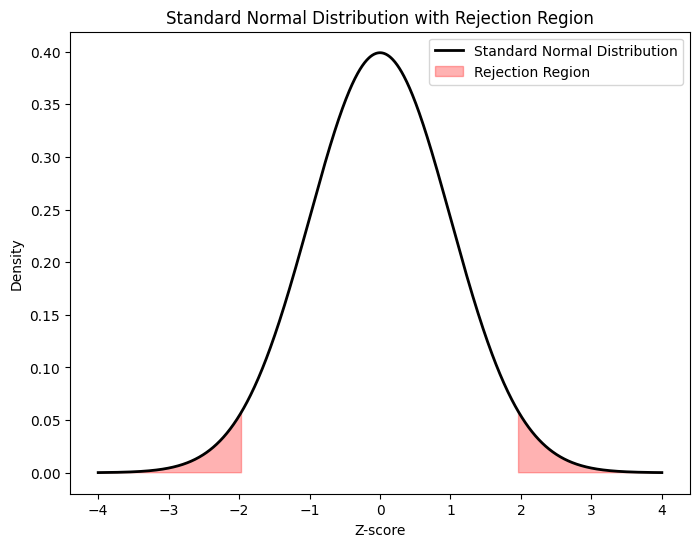

In [2]:
# Generate x values for the standard normal distribution
x = np.linspace(-4, 4, 1000)

# Calculate the critical z-scores
z_critical = stats.norm.ppf(1 - 0.05/2)

# Plot the standard normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, stats.norm.pdf(x), 'black', lw=2, label='Standard Normal Distribution')

# Shade the rejection region
plt.fill_between(x, stats.norm.pdf(x), where=(x <= -z_critical) | (x >= z_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Add labels and title
plt.title('Standard Normal Distribution with Rejection Region')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.show()

### Step 5: Compute the Test Statistic and P-value

Using the sample data, compute the test statistic:

In [3]:
# Sample data (weights)
sample = [150, 155, 160, 165, 170, 175, 180]

# Sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
sample_size = len(sample)

# Hypothesized mean
mu_0 = 165

# Calculate the z-score
z_score = (sample_mean - mu_0) / (sample_std / np.sqrt(sample_size))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

### Step 6: Make a Decision

Compare the p-value with the significance level. If the p-value is less than or equal to the significance level ($\alpha = 0.05$), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

In [4]:
if p_value <= 0.05:
    decision = 'Reject H0'
else:
    decision = 'Fail to reject H0'

### Step 7: Draw Conclusions

Based on the decision made in Step 6, draw conclusions about the population.

In [5]:
if p_value <= 0.05:
    conclusion = 'There is evidence to support that the mean weight is different from 165.'
else:
    conclusion = 'There is insufficient evidence to support that the mean weight is different from 165.'

print(conclusion)

There is insufficient evidence to support that the mean weight is different from 165.
